In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("general_data.csv")

In [4]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [5]:
df = df.dropna()

In [6]:
df = df.drop_duplicates()

In [7]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


(array([1088., 1041.,  864.,  324.,  326.,  167.,  156.,   54.,  161.,
         201.]),
 array([ 10090.,  29080.,  48070.,  67060.,  86050., 105040., 124030.,
        143020., 162010., 181000., 199990.]),
 <a list of 10 Patch objects>)

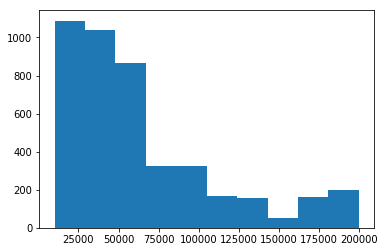

In [8]:
plt.hist(df.MonthlyIncome)

In [9]:
df.MonthlyIncome.skew()

1.3674572098623383

# Monthly Salary is Not-Normaly Distributed (Skew != 0)

### Therefore we can go for Non-Paramentric tests in the case of monthly Salary

In [12]:
# Encoding Attrition Column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Attrition = le.fit_transform(df.Attrition)

df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [25]:
# Taking all data whose Attrition == "Yes"
df_attr_yes = df[df["Attrition"] == 1]
df_attr_yes.head()
print(df_attr_yes.shape)

(705, 24)


In [26]:
# Taking all data whose Attrition == "No"
df_attr_no = df[df["Attrition"] == 0]
df_attr_no.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
2,32,0,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
5,46,0,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,...,3.0,Y,13,8,0,28.0,5,7,7,7


# Attrition and Monthly Income

#### H0: There is no Significant difference in monthly income of The people who left and the people who stayed

#### H1: There is Significant difference in monthly income of The people who left and the people who stayed

##### Mann whitney Test

In [28]:
from scipy.stats import mannwhitneyu

stats,p = mannwhitneyu(df_attr_yes.MonthlyIncome,df_attr_no.MonthlyIncome)

print(stats,p)

if p<0.05:
    print("Reject H0")
else:
    print("Accept H0")

1249573.5 0.06508807631576838
Accept H0


## Therefore : 
### There is Significant difference in monthly income of The people who left and the people who stayed

# Gender and Attrition

#### H0: There is no Dependancy between Gender And Attrition

#### H1: There is Dependancy between Gender And Attrition

##### Chi Square Test (To check Dependancy Between two categorical Variables)

In [35]:
from scipy.stats import chi2_contingency

chitable = pd.crosstab(df.Attrition,df.Gender)

print(chitable)

Gender     Female  Male
Attrition              
0            1488  2189
1             268   437


In [37]:
stats,p,dof,expected = chi2_contingency(chitable)

print(stats,p)

if p<0.05:
    print("Reject H0")
else:
    print("Accept h0")

1.3825823839528295 0.23966176275638887
Accept h0


## Therefore
### H0: There is no Dependancy between Gender And Attrition

# DistanceFromHome of the people who left and Distance from home of People who Stayed

#### H0: There is no Significant difference in DistanceFromHome of The people who left and the people who stayed

#### H1: There is Significant difference in DistanceFromHome of The people who left and the people who stayed

##### Mann whitney Test

In [38]:
from scipy.stats import mannwhitneyu

stats,p = mannwhitneyu(df_attr_yes.DistanceFromHome,df_attr_no.DistanceFromHome)
print(stats,p)

if p<0.05:
    print("Reject H0")
else:
    print("Accept h0")

1295261.0 0.488538986087403
Accept h0


## Therefore : 
### There is no Significant difference in DistanceFromHome of The people who left and the people who stayed

(array([237.,  83., 116.,  84.,   6.,  60.,  42.,  27.,  18.,  32.]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <a list of 10 Patch objects>)

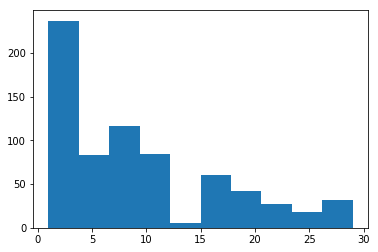

In [39]:
plt.hist(df_attr_yes.DistanceFromHome)

(array([1260.,  476.,  628.,  320.,  112.,  173.,  176.,  164.,  216.,
         152.]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <a list of 10 Patch objects>)

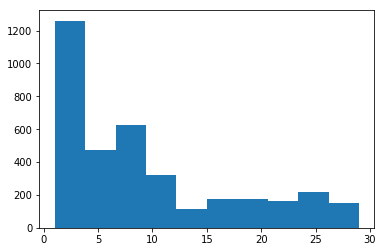

In [40]:
plt.hist(df_attr_no.DistanceFromHome)

# Applying ttest_independant on DistanceFromHome and Attrition

In [41]:
from scipy.stats import ttest_ind

stats,p = ttest_ind(df_attr_yes.DistanceFromHome,df_attr_no.DistanceFromHome)

print(stats,p)

if p<0.05:
    print("Reject H0")
else:
    print("Accept H0")

-0.6253536318706914 0.5317715668047676
Accept H0


### Hence After Applying Both Mann-Whitney And Ttest,
We got the result that there is no significant Difference in Distance_fromHome of the People who left and the people who Stayed

# Education and Attrition

In [42]:
df.Education.unique() #Hence Education is a categorical Variable

array([2, 1, 4, 5, 3], dtype=int64)

#### H0: There is no Dependancy between Education And Attrition

#### H1: There is Dependancy between Education And Attrition

##### Chi Square Test (To check Dependancy Between two categorical Variables)

In [43]:
chi_table = pd.crosstab(df.Attrition,df.Education)
print(chi_table)

stats , p,dof,expected = chi2_contingency(chi_table)

print("\n",stats,p)
if p<0.05:
    print("Reject H0")
else:
    print("\nAccept H0")

Education    1    2     3     4    5
Attrition                           
0          430  683  1438  1003  123
1           78  159   263   185   20

 6.2735361781270615 0.17963050984273224

Accept H0


## Therefore
### H0: There is no Dependancy between Education And Attrition

# Number Of Companies Worked And Attrition

In [44]:
df.NumCompaniesWorked.unique()

array([1., 0., 3., 4., 2., 7., 9., 5., 6., 8.])

(array([ 584., 1556.,  438.,  474.,  413.,  187.,  208.,  219.,  147.,
         156.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

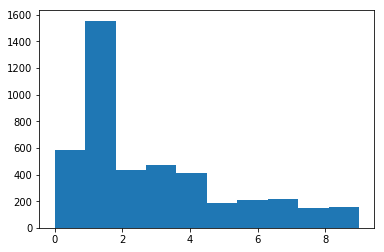

In [46]:
plt.hist(df.NumCompaniesWorked)

In [47]:
chi_table = pd.crosstab(df.Attrition,df.NumCompaniesWorked)
print(chi_table)

stats , p,dof,expected = chi2_contingency(chi_table)

print("\n",stats,p)
if p<0.05:
    print("Reject H0")
else:
    print("\nAccept H0")

NumCompaniesWorked  0.0   1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0
Attrition                                                            
0                   515  1264  390  426  364  141  160  168  129  120
1                    69   292   48   48   49   46   48   51   18   36

 75.85546138415296 1.0708854426925246e-12
Reject H0


In [48]:
stats,p = mannwhitneyu(df_attr_yes.NumCompaniesWorked,df_attr_no.NumCompaniesWorked)

print(stats,p)

if p<0.05:
    print("Reject H0")
else:
    print("Accept H0")

1238814.5 0.02793197853866981
Reject H0


Considering Num_companies worked as a categorical Variable, Applied Chi2_test

and Considering Num_companies worked as a Numerical Continuous variable, Applied MannWhitney
#### (Got same Result as There is Dependancy Between Number of Companies Worked And Attrition)

# PercentSalaryHike and Attrition

(array([1219.,  622.,  899.,  231.,  242.,  494.,  165.,  310.,   83.,
         117.]),
 array([11. , 12.4, 13.8, 15.2, 16.6, 18. , 19.4, 20.8, 22.2, 23.6, 25. ]),
 <a list of 10 Patch objects>)

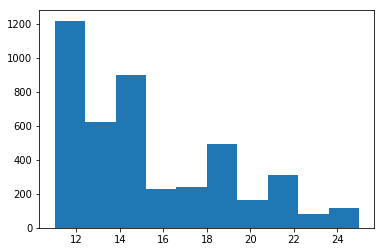

In [49]:
plt.hist(df.PercentSalaryHike)

In [50]:
df.PercentSalaryHike.skew()

0.819509854475826

In [51]:
from scipy.stats import skew
skew([1,2,3,4,5,4,3,2,1])

0.12073632210407392

(array([1., 2., 0., 3., 0., 4., 3., 0., 2., 1.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

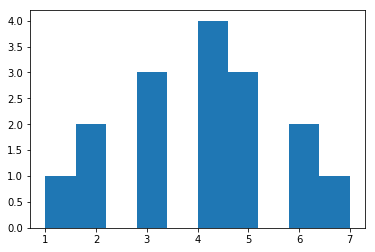

In [53]:
plt.hist([1,2,2,3,3,3,4,4,4,4,5,5,5,6,6,7])

In [54]:
skew([1,2,2,3,3,3,4,4,4,4,5,5,5,6,6,7])

0.0

In [55]:
from scipy.stats import shapiro

w,p = shapiro([1,2,2,3,3,3,4,4,4,4,5,5,5,6,6,7])
print(w,p)

0.9721681475639343 0.872389018535614


In [56]:
from scipy.stats import shapiro

w,p = shapiro(df.MonthlyIncome)
print(w,p)

0.827752947807312 0.0


In [57]:
df.DistanceFromHome.skew()

0.9555166195089603

In [58]:
from scipy.stats import shapiro

w,p = shapiro(df.DistanceFromHome)
print(w,p)

0.8619658946990967 0.0


In [59]:
df.MonthlyIncome.skew()

1.3674572098623383